In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('D:/Games/cell_images'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
infected = 'E:/GuardU-main/app testing/malaria/parasitized'
uninfected = 'E:/GuardU-main/app testing/malaria/uninfected'

In [48]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [49]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D
# from tensorflow.keras.applications.vgg19 import VGG19

In [50]:
data=pd

In [51]:
infected_images = []
for file in os.listdir(infected):
    if file == 'Thumbs.db':
        pass
    else:
        img = Image.open(os.path.join(infected, file))
        img = img.resize((36,36))
        img = np.asarray(img)
        infected_images.append(img)

In [52]:
uninfected_images = []
for file in os.listdir(uninfected):
    if file == 'Thumbs.db':
        pass
    else:
        img = Image.open(os.path.join(uninfected, file))
        img = img.resize((36,36))
        img = np.asarray(img)
        uninfected_images.append(img)

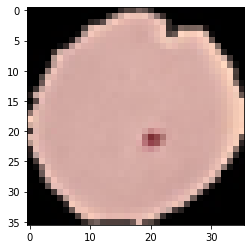

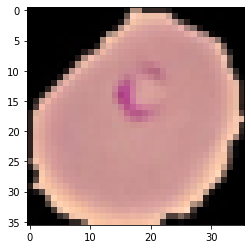

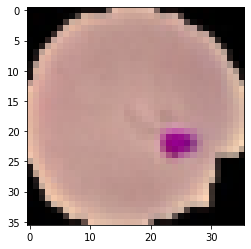

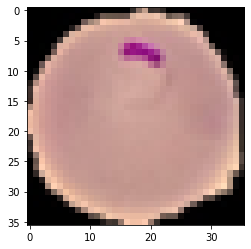

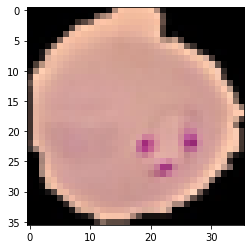

In [53]:
for i in range(5):
    plt.imshow(infected_images[i])
    plt.show()

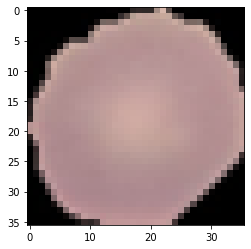

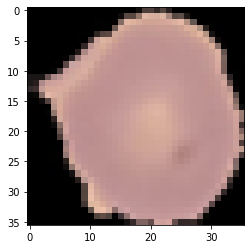

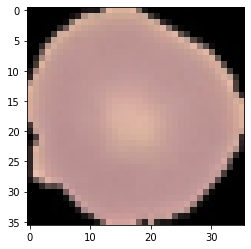

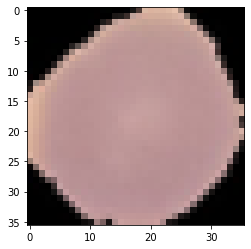

In [54]:
for i in range(4):
    plt.imshow(uninfected_images[i])
    plt.show()

In [55]:
images = np.asarray(infected_images + uninfected_images)
images.shape

(10, 36, 36, 3)

In [56]:
labels = np.asarray([1 for _ in range(len(infected_images))] + [0 for _ in range(len(uninfected_images))])
labels.shape

(10,)

In [57]:
from sklearn.utils import shuffle

In [58]:
images, labels = shuffle(images, labels)

1


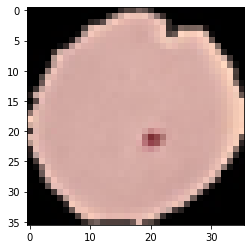

0


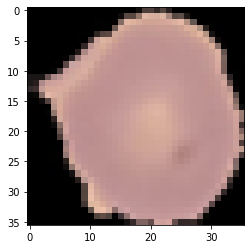

0


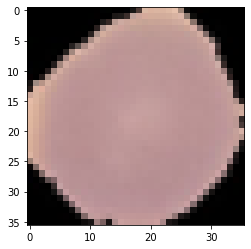

1


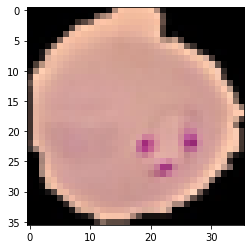

1


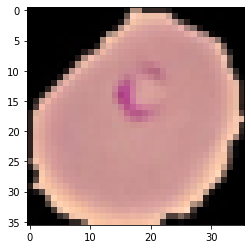

0


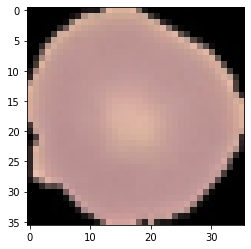

1


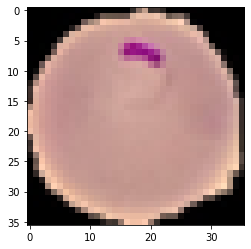

1


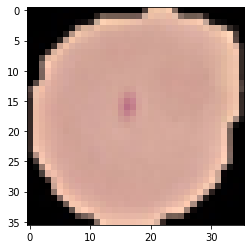

0


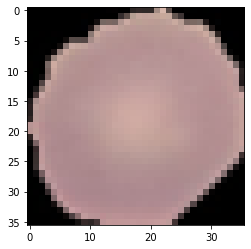

1


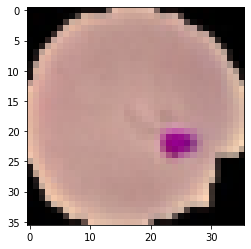

In [59]:
for i in range(10):
    print(labels[i])
    plt.imshow(images[i])
    plt.show()

In [60]:
# np.save('images.npy', images)
# np.save('labels.npy', labels)

In [61]:
from tensorflow.keras.utils import to_categorical

In [62]:
labels = to_categorical(labels, num_classes = 2)
labels[:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = 42)

In [64]:
print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (8, 36, 36, 3) (8, 2)
Test size: (2, 36, 36, 3) (2, 2)


In [65]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape = X_train.shape[1:]))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(96, activation='relu'))

model.add(Dense(2, activation='softmax'))

In [66]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [67]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose = 1)

Epoch 1/15
1/1 [==============================] - 1s 957ms/step - loss: 0.9223 - accuracy: 0.6250 - val_loss: 37.1871 - val_accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 62ms/step - loss: 1.7185 - accuracy: 0.7500 - val_loss: 61.6889 - val_accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 0s 66ms/step - loss: 0.2271 - accuracy: 0.8750 - val_loss: 76.0253 - val_accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 0s 69ms/step - loss: 0.0221 - accuracy: 1.0000 - val_loss: 84.1156 - val_accuracy: 0.0000e+00
Epoch 5/15
1/1 [==============================] - 0s 69ms/step - loss: 0.0514 - accuracy: 1.0000 - val_loss: 88.0470 - val_accuracy: 0.0000e+00
Epoch 6/15
1/1 [==============================] - 0s 66ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 90.7246 - val_accuracy: 0.0000e+00
Epoch 7/15
1/1 [==============================] - 0s 71ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 92.8107 - val_accuracy: 0.

In [68]:
pred = [np.argmax(i) for i in model.predict(X_test)]
pred[:5]

[1, 1]

In [69]:
tru = [np.argmax(i) for i in y_test]
from sklearn.metrics import confusion_matrix
confusion_matrix(tru, pred)

array([[0, 2],
       [0, 0]], dtype=int64)

In [70]:
model.save('malaria.h5')